# Drone Detection Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib.patches as patches


# set plots theme
sns.set_theme(style="whitegrid")

# get images and labels folders
image_folder_train = '../../data-analysis/data/drone_data/drone-detection-new.v5-new-train.yolov8/train/images'
label_folder_train = '../../data-analysis/data/drone_data/drone-detection-new.v5-new-train.yolov8/train/labels'

# get first 2000 images
idx = 10
images_list = os.listdir(image_folder_train)[0:idx]
labels_list = os.listdir(label_folder_train)[0:idx]

# create dataframe
images = []
labels = []

# Loop through all files in the folder
for image_name in images_list:

    # define file paths
    label_name = os.path.splitext(image_name)[0] + ".txt"
    image_file_path = os.path.join(image_folder_train, image_name)
    label_file_path = os.path.join(label_folder_train, label_name)
    
    # Read the image using OpenCV
    img = cv2.imread(image_file_path)
    
    # Convert BGR to RGB (optional)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # read label
    if os.stat(label_file_path).st_size > 0:
        # Try loading the file
        label = np.loadtxt(label_file_path)
    else:
        label = np.nan
    
    # Add data to the list
    images.append(img_rgb)
    labels.append(label)

images = np.array(images)

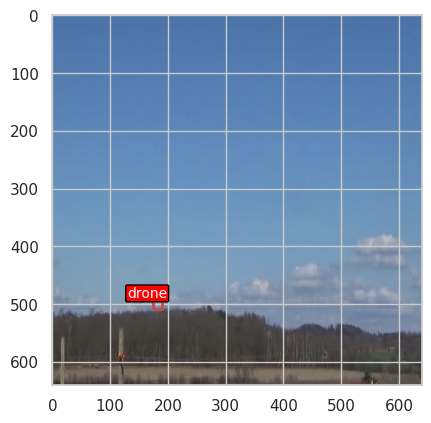

In [5]:
def plot_image_label(idx, images, labels):
    fig, ax = plt.subplots()
    
    if not isinstance(labels[idx], np.ndarray):
        category = 'bird'
        print(category)
        ax.imshow(images[idx])
        plt.show()
        return None
        
    
    category_dict = {0: 'airplane', 1: 'drone', 2: 'helicopter'}
    label = labels[idx][0]
    category = category_dict.get(label, 'Unknown')

    # define square
    x_min = (labels[idx][1] - labels[idx][3]/2)*images.shape[1]
    y_min = (labels[idx][2] - labels[idx][4]/2)*images.shape[1]
    width = labels[idx][3]*images.shape[1]
    height = labels[idx][4]*images.shape[1]
    
    # plot
    
    ax.imshow(images[idx])
    rectangle = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.text(x_min-10, y_min-10, category, color='white', fontsize=10,
         ha='center', va='center',
         bbox=dict(facecolor='red', edgecolor='black', boxstyle='round,pad=0.1'))
    ax.add_patch(rectangle)
    plt.show()

plot_image_label(6, images, labels)

In [76]:
%cd data-analysis/object_detection

/home/francesco/data-analysis/object_detection


In [47]:
%cd yolov5/
!pwd
!yoloenv/bin/python detect.py --weights yolov5s.pt --source ../../data/drone_data/drone-detection-new.v5-new-train.yolov8/test/images/V_AIRPLANE_0011_025_png.rf.1224f43106fb9462c60db7add1b26996.jpg

/home/francesco/data-analysis/object_detection/yolov5
/home/francesco/data-analysis/object_detection/yolov5
detect: weights=['yolov5s.pt'], source=../../data/drone_data/drone-detection-new.v5-new-train.yolov8/test/images/V_AIRPLANE_0011_025_png.rf.1224f43106fb9462c60db7add1b26996.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.8.10 torch-2.4.1+cu121 CUDA:0 (Quadro P1000, 4030MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /home/francesco/data-analysis/data/drone_data/drone-

In [54]:
import sys
import os
import torch
folder_path = os.path.join(os.getcwd(), 'yolov5')
sys.path.append(folder_path)
from models.common import DetectMultiBackend

x = images[0].reshape(1,3,640,640)
x = torch.tensor(x).float() / 255.0
model = DetectMultiBackend()
y = model(x)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
